In [1]:
from AnastrisTNG import TNGsimulation, TNGtools, Anatools, TNGmergertree  
import numpy as np
import matplotlib.pyplot as plt

In [9]:
import scienceplots
plt.style.use(['science','no-latex'])

In [2]:
run = 'TNG50'
BasePath = '/home/dumin/IllustrisTNG/' + run + '-1/output/'         
snap=99                                                            

In [3]:
Snapshot=TNGsimulation.Snapshot(BasePath,snap)                    

## 查询星系的演化历史

In [12]:
# 查询snapshot99中 id为8的星系演化历史
galaxy_evo = Snapshot.galaxy_evolution(8,fields=['SubhaloBHMass','SubhaloMass','SubhaloSFR'],physical_units=True)
# 底层函数在TNGmergertree 的 galaxy_evolution

fields 见 https://www.tng-project.org/data/docs/specifications/#sec2b \
使用physical_units=True，默认为Ture，来转换单位中的 h 和 a。\
如果需要在共动坐标，则需要将physical_units 设置为false。并自行转换单位

In [6]:
galaxy_evo.keys()

dict_keys(['count', 'SubhaloMass', 'SnapNum', 'SubhaloSFR', 'SubhaloBHMass', 'SubfindID', 'a', 't'])

SubfindID 为该星系在对应 的SnapNum 的ID，即index \
a 为尺度因子，方便用于单位转化 \
t 为宇宙年龄，即时间

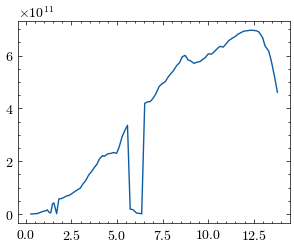

In [10]:
plt.plot(galaxy_evo['t'].in_units('Gyr'),galaxy_evo['SubhaloMass'].in_units('Msol'))

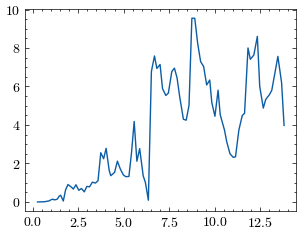

In [11]:
plt.plot(galaxy_evo['t'].in_units('Gyr'),galaxy_evo['SubhaloSFR'].in_units('Msol yr**-1'))

## 查询星系的并合历史

In [13]:
# 查询snapshot99中 id为8的星系并合历史
galaxy_merger = Snapshot.merger_history(subID=8,fields=['SubhaloBHMass','SubhaloMass','SubhaloSFR'],minMassRatio=0.1,massPartType='star')
# 底层函数在TNGmergertree 的 merger_history

fields 见 https://www.tng-project.org/data/docs/specifications/#sec2b \
minMassRatio 查询的并合的最小质量比 \
massPartType 使用什么类型的粒子计算质量比

In [14]:
galaxy_merger.keys()

dict_keys(['MergerEvents', 'MassRatio', 'First-SubhaloSFR', 'Next-SubhaloSFR', 'First-SubhaloMass', 'Next-SubhaloMass', 'First-SubhaloBHMass', 'Next-SubhaloBHMass', 'First-SnapNum', 'Next-SnapNum', 'numMergers', 'First-a', 'Next-a', 'First-t', 'Next-t'])

numMergers 总共的并合次数 \
MergerEvents 为并合次数在各个snap的分布 \
MassRatio 为相应并合的质量比 \
First- 为主星系的在并合时的参数 \
Next- 为并合进来的星系的参数

In [15]:
galaxy_merger['MassRatio']

[2.4051588, 0.24679022, 1.3201656, 0.33357, 0.12480445, 0.18332091, 0.70742]

## 查询Halo的演化历史

In [16]:
# 查询snapshot99中 id为0的halo并合历史
halo_evo = Snapshot.halo_evolution(haloID=0,physical_units=True)
# 底层函数在TNGmergertree 的 halo_evolution

该函数没有field 参数，载入该halo的所有参数的演化，参数见 https://www.tng-project.org/data/docs/specifications/#sec2a \

返回参数类似 galax_evolution

In [17]:
halo_evo.keys()

dict_keys(['GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200', 'HaloID', 'SnapNum', 'count', 'a', 't'])

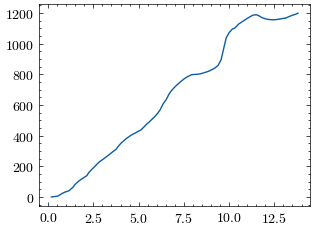

In [18]:
plt.plot(halo_evo['t'].in_units('Gyr'),halo_evo['Group_R_Crit200'].in_units('kpc'))